In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\UDEMY\Project 1_Hotel Booking/hotel_bookings.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head() # first five 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [5]:
df.shape       # number of rows and columns in table

(119390, 32)

In [6]:
df.isnull().sum()  # total null values 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

IDEA IS TO DELETE THE AGENT AND COMPANY COLUMNS BCOZ IT'S INFO OF TRAVEL AGENCY WHICH IS IRREVELANT

In [7]:
df.drop(['agent','company'],axis=1,inplace=True) #dropping irrelevant columns 

In [8]:
df['country'].value_counts().index # countries from where the bookings are been done

Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD',
       ...
       'MMR', 'NPL', 'BHS', 'UMI', 'SMR', 'DJI', 'BWA', 'HND', 'VGB', 'NAM'],
      dtype='object', length=177)

In [9]:
df['country'].fillna(df['country'].value_counts().index[0],inplace = True)

In [10]:
df.fillna(0,inplace=True) #replacing null values with 0

In [11]:
df.isnull().sum()  # checking total null values 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [13]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10-06-2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10-12-2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,01-04-2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,01-05-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,07-01-2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [14]:
data1 = df[~filter1]

In [15]:
data1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [16]:
data1.shape

(119210, 30)

In [17]:
df.shape

(119390, 30)

WHERE DO THE GUESTS COME FROM ??

In [18]:
data1['is_canceled'].unique() # ALL POSSIBLE VALUES OF is_canceled column

array([0, 1], dtype=int64)

In [19]:
country_wise_data = data1[data1['is_canceled']==0]['country'].value_counts().reset_index()  # getting results of countries from where the booking is not canceled
country_wise_data.columns = ['country','no of guests'] # changing the column name in dataframe
country_wise_data

,country,no of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [20]:
len(data1[data1['is_canceled']==0])

75011

In [21]:
cancelled_country = data1[data1['is_canceled']==1]['country'].value_counts().reset_index()  # getting results of countries from where the booking is  cancelled
cancelled_country.columns = ['country','no of guests'] # changing the column name in dataframe
cancelled_country

,country,no of guests
0,PRT,27563
1,GBR,2452
2,ESP,2177
3,FRA,1933
4,ITA,1333
...,...,...
122,UMI,1
123,HND,1
124,FJI,1
125,SYC,1


In [22]:
!pip install chart studio 

  Using cached chart-0.2.3.tar.gz (5.5 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Studio-0.5.1.tar.gz (2.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [36 lines of output]
  C:\Users\Lenovo\anaconda3\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
    warnings.warn(
  ERROR: Could not find a version that satisfies the requirement PasteScript==dev,>=1.6.3dev-r7326 (from versions: 0.3, 0.3.1, 0.4, 0.4.1, 0.4.2, 0.5, 0.5.1, 0.9, 0.9.6, 0.9.7, 0.9.8, 1.0, 1.1, 1.3, 1.3.1, 1.3.2, 1.3.3, 1.3.4, 1.3.5, 1.3.6, 1.6, 1.6.1, 1.6.1.1, 1.6.2, 1.6.3, 1.7, 1.7.2, 1.7.3, 1.7.4, 1.7.4.1, 1.7.4.2, 1.7.5, 2.0, 2.0.1, 2.0.2, 3.0.0, 3.1.0, 3.1.1, 3.2.0, 3.2.1, 3.3.0)
  ERROR: No matching distribution found for PasteScript==dev,>=1.6.3dev-r7326
  Traceback (most recent call last):
    File "C:\Users\Lenovo\anaconda3\lib\site-packages\setuptools\installer.py", line 82, in fetch_build_egg
      subprocess.check_call(cmd)
    F

In [23]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)  #plotly visualization in offline mode

In [24]:
import plotly.express as px

In [25]:
map_guest = px.choropleth(country_wise_data,
             locations = country_wise_data['country'],
             color =  country_wise_data['no of guests'],
             hover_name = country_wise_data['country'],
             title = 'home country of guests')

In [26]:
map_guest.show()

In [27]:
data2 = data1[data1['is_canceled']==0]

In [28]:
data2.columns # checking all the columns of data2

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'Price in EUR')

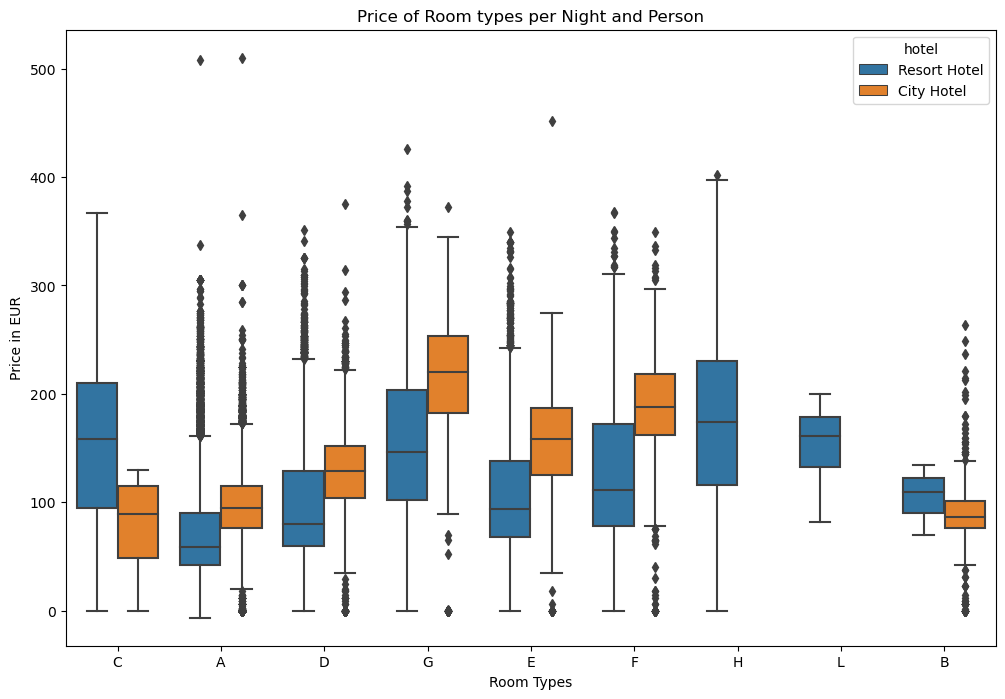

In [29]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'reserved_room_type',y = 'adr',hue = 'hotel', data = data2)
plt.title('Price of Room types per Night and Person')
plt.xlabel('Room Types')
plt.ylabel('Price in EUR')

FROM THIS BOXPLOT , WE CAN SAY THAT THE MEDIAN FOR CITY HOTEL[ROOM G] = MAXIMUM AND THE MEDIAN FOR RESORT HOTEL[ROOM H] = MAXIMUM


In [30]:
data2['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [31]:
data_resort = data2[(data2['hotel']=='Resort Hotel') & (data2['is_canceled']==0)]
data_city = data2[(data2['hotel']=='City Hotel') & (data2['is_canceled']==0)]

In [32]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [33]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month','no_of_arrivals']
rush_resort

,month,no_of_arrivals
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [34]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month','no_of_arrivals']
rush_city

,month,no_of_arrivals
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [35]:
final_rush = rush_city.merge(rush_resort,on = 'month') #merging the city and resort dataframe

In [36]:
final_rush.columns = ['month','no of guests in city','no of guests in resort']


In [37]:
final_rush

,month,no of guests in city,no of guests in resort
0,August,5367,3257
1,July,4770,3137
2,May,4568,2535
3,June,4358,2037
4,October,4326,2575
5,September,4283,2102
6,March,4049,2571
7,April,4010,2550
8,February,3051,2308
9,November,2676,1975


In [38]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

In [39]:
import sort_dataframeby_monthorweek as sdm

In [40]:
sort_final_rush = sdm.Sort_Dataframeby_Month(final_rush , 'month')

In [41]:
px.line(data_frame = sort_final_rush, x ='month',y =  ['month','no of guests in city','no of guests in resort'])

In [42]:
##AUGUST HAS MAXIMUM RUSH FOR NO OF GUESTS

In [43]:
data = sdm.Sort_Dataframeby_Month(data2,'arrival_date_month')

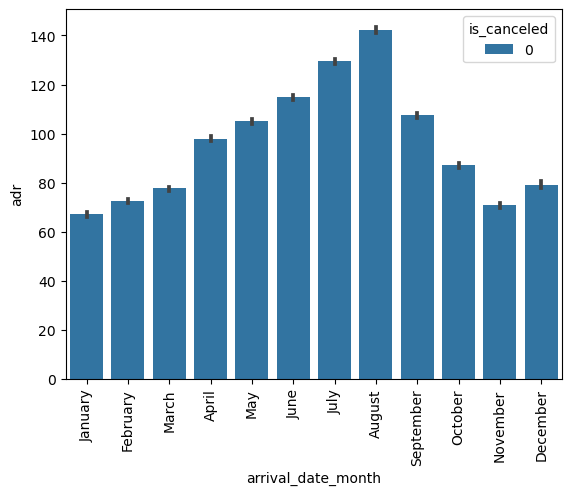

In [44]:
sns.barplot(x = 'arrival_date_month', y ='adr' , data = data , hue = 'is_canceled')
plt.xticks(rotation = 'vertical')
plt.show()

In [45]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [46]:
pd.crosstab(index = data['stays_in_weekend_nights'],columns = data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,21,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,622,12141,9513,6735,2864,535,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3593,4501,5162,4029,1598,725,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1457,3820,4122,2976,1591,5679,516,284,275,53,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,198,173,281,84,31,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,70,223,136,75,49,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [47]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights' 
    feature2 = 'stays_in_week_nights' 
    
    if row [feature1] > 0 and row[feature2] == 0 :
        return'stay_just_weekend'
    elif row [feature1] == 0 and row[feature2] > 0 :
        return'stay_just_weekdays'
    elif row [feature1] > 0 and row[feature2] > 0 :
        return'stay_both_weekdays__weekends'
    else:
        return'undefined_data'

In [48]:
data2['weekend_or_weekday'] = data2.apply(week_function,axis=1) # ADDED NEW FEATURE

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12376\4032524308.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,07-01-2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,07-01-2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07-02-2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,07-02-2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,07-03-2015,stay_just_weekdays


In [50]:
data2['weekend_or_weekday'].value_counts() # NO OF COUNTS WHO STAYED IN HOTEL FOR WEEKDAYS AND WEEKENDS

stay_both_weekdays__weekends    37551
stay_just_weekdays              31788
stay_just_weekend                5050
undefined_data                    622
Name: weekend_or_weekday, dtype: int64

In [51]:
type(sdm)

module

In [52]:
sdm.Sort_Dataframeby_Month(data2,'arrival_date_month')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,01-02-2016,stay_just_weekdays
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,01-02-2016,stay_just_weekdays
2,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,73.46,0,2,Check-Out,01-03-2016,stay_just_weekdays
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,No Deposit,0,Transient,90.17,0,2,Check-Out,01-03-2016,stay_just_weekdays
4,Resort Hotel,0,110,2016,January,1,2,2,5,2,...,0,No Deposit,0,Transient,46.93,0,3,Check-Out,01-09-2016,stay_both_weekdays__weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75006,City Hotel,0,173,2016,December,53,26,3,8,2,...,4,No Deposit,0,Transient,117.82,0,1,Check-Out,01-06-2017,stay_both_weekdays__weekends
75007,City Hotel,0,17,2016,December,53,30,2,5,2,...,0,No Deposit,0,Transient,90.34,0,1,Check-Out,01-06-2017,stay_both_weekdays__weekends
75008,City Hotel,0,107,2016,December,53,31,2,5,2,...,0,No Deposit,0,Transient,103.57,0,0,Check-Out,01-07-2017,stay_both_weekdays__weekends
75009,City Hotel,0,310,2016,December,53,27,2,10,2,...,2,No Deposit,0,Transient-Party,68.57,0,2,Check-Out,01-08-2017,stay_both_weekdays__weekends


In [53]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday          
April               stay_both_weekdays__weekends    3627
                    stay_just_weekdays              2559
                    stay_just_weekend                344
                    undefined_data                    30
August              stay_both_weekdays__weekends    4929
                    stay_just_weekdays              3137
                    stay_just_weekend                509
                    undefined_data                    49
December            stay_both_weekdays__weekends    1901
                    stay_just_weekdays              2123
                    stay_just_weekend                298
                    undefined_data                    69
February            stay_both_weekdays__weekends    2438
                    stay_just_weekdays              2514
                    stay_just_weekend                360
                    undefined_data                    47
January             stay_both_weekdays_

In [54]:
group_data = data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()# for getting dataframe in matrix form

In [55]:
sorted_data = sdm.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [56]:
sorted_data.replace('\d+', '', regex=True, inplace=True)

In [57]:
sorted_data

,arrival_date_month,stay_both_weekdays__weekends,stay_just_weekdays,stay_just_weekend,undefined_data
0,January,1550,2125,393,47
1,February,2438,2514,360,47
2,March,3151,3060,359,50
3,April,3627,2559,344,30
4,May,3442,3017,570,74
5,June,3241,2685,433,36
6,July,4570,2818,462,57
7,August,4929,3137,509,49
8,September,3192,2692,479,22
9,October,3393,2844,582,82


In [58]:
#sorted_data.plot(x = "arrival_date_month",y = ["stay_both_weekdays__weekends","stay_just_weekdays","stay_just_weekend","undefined_data"] kind="bar",figsize = (15,10))

<AxesSubplot:xlabel='arrival_date_month'>

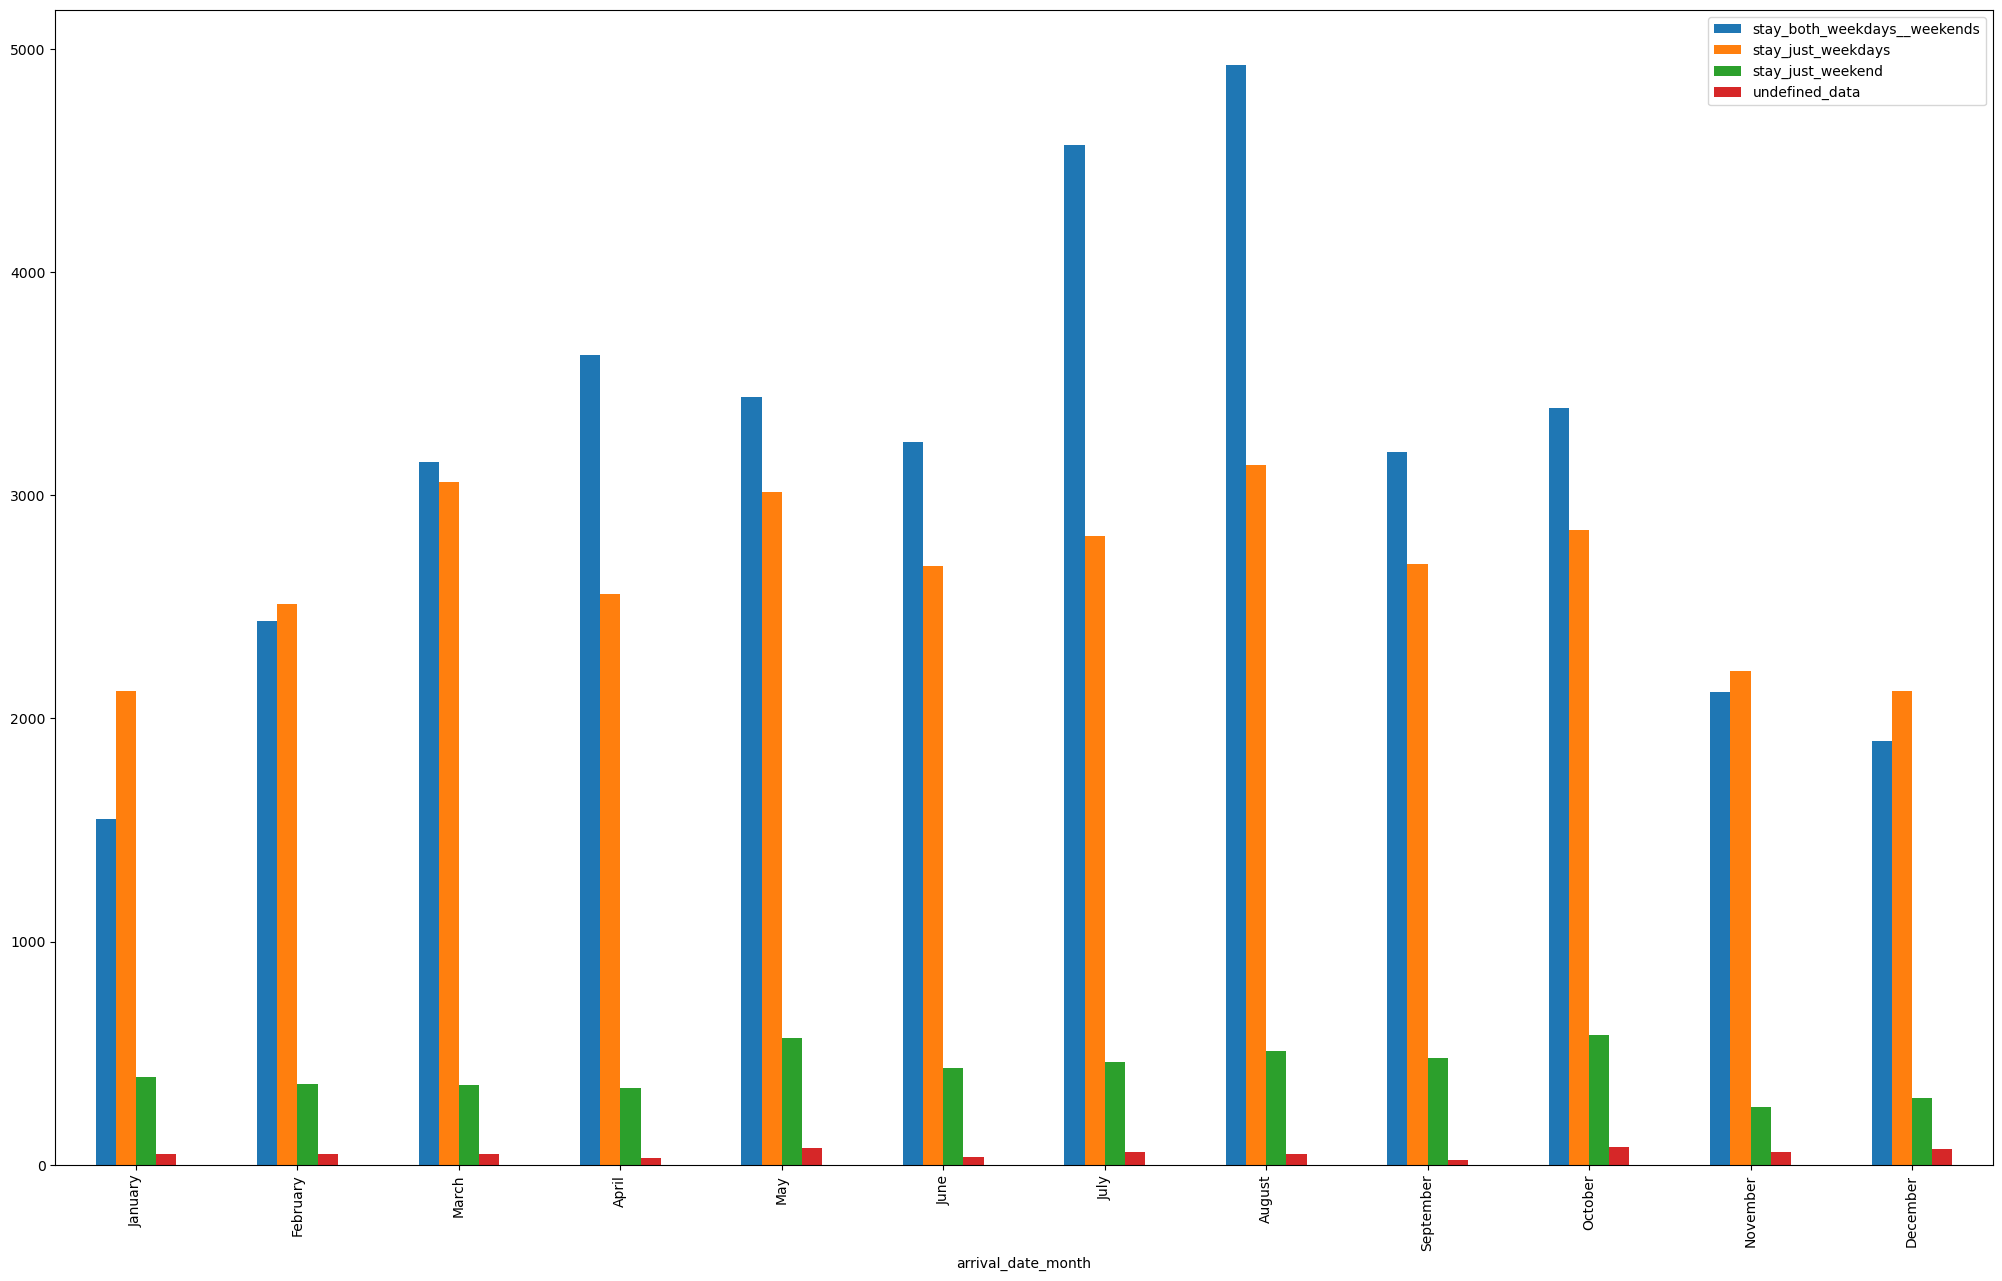

In [59]:
sorted_data.plot(x = "arrival_date_month", kind="bar",figsize = (25,15))

In [60]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [61]:
def family(row):
    if(row['adults']>0) & (row['children']>0 or row ['babies']>0) :
        return 1
    else:
        return 0

In [62]:
data['is_family'] = data.apply(family , axis = 1) # execute the family data on column

In [63]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [64]:
data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [65]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,01-02-2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,01-02-2016,1,4.0,1
2,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,01-03-2016,0,2.0,2
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,90.17,0,2,Check-Out,01-03-2016,1,3.0,2
4,Resort Hotel,0,110,2016,January,1,2,2,5,2,...,0,Transient,46.93,0,3,Check-Out,01-09-2016,0,2.0,7


In [66]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [67]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [68]:
dict1 = {'No Deposit':0 , 'Non Refund': 1 , 'Refundable':0}

In [69]:
data['deposit_given'] = data['deposit_type'].map(dict1) # columns added

In [70]:
data.drop(columns = ['adults', 'children', 'babies','deposit_type'],axis = 1,inplace = True)

In [72]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,01-02-2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,01-02-2016,1,4.0,1,0
2,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,01-03-2016,0,2.0,2,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,90.17,0,2,Check-Out,01-03-2016,1,3.0,2,0
4,Resort Hotel,0,110,2016,January,1,2,2,5,BB,...,Transient,46.93,0,3,Check-Out,01-09-2016,0,2.0,7,0


In [73]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [74]:
cate_features = [col for col in data.columns if data[col].dtype == 'object']

In [75]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [77]:
data[cate_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,01-02-2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,01-02-2016
2,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,01-03-2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,01-03-2016
4,Resort Hotel,January,BB,FRA,Online TA,TA/TO,D,E,Transient,Check-Out,01-09-2016
...,...,...,...,...,...,...,...,...,...,...,...
75006,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,01-06-2017
75007,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,01-06-2017
75008,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,01-07-2017
75009,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,01-08-2017


In [78]:
num_features = [col for col in data.columns if data[col].dtype != 'object']

In [79]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,90.17,0,2,1,3.0,2,0
4,0,110,2016,1,2,2,5,0,0,0,0,0,46.93,0,3,0,2.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75006,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
75007,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
75008,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
75009,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [81]:
data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.0
Resort Hotel    0.0
Name: is_canceled, dtype: float64